In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from scipy import interpolate
# read csv
bag_data = pd.read_csv("./bag.csv")
o18_data = pd.read_csv("./o18.csv")

In [38]:
time_08 = np.linspace(0,800000,800001)

In [37]:
time_53 = np.linspace(0,5300000,5300001)

In [57]:
#前0.8百万年的温度插值
temp = bag_data['Temperature']
age = bag_data['Age']
deu = bag_data['Deuterium']
f=interpolate.interp1d(age,temp,kind='slinear')

In [51]:
index = age.tolist().index(min(age.tolist()))
t = temp[index]
t

0.88

In [52]:
list1 = [t]
for i in range(int(age.min())):
    list1.append(t)
time_cap = np.linspace(int(age.min())+1,800000,800000-int(age.min()))
list2= f(time_cap).tolist()

In [56]:
temp_int = np.array(list1+list2) # 前0.8百万年温度

No handles with labels found to put in legend.


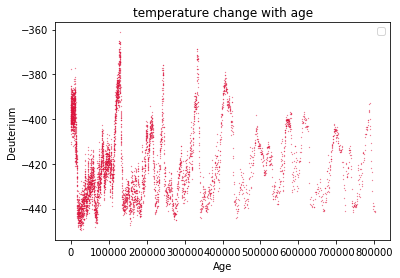

In [58]:
#colour = -np.arctan2(deu, temperature) # 生成每个点的颜色大小，每个数据点生成控制颜色的数组 colour
plt.scatter(age,deu,s=0.05,c='crimson' )
#plt.colorbar() 
plt.xlabel('Age')
plt.ylabel('Deuterium')
plt.title("temperature change with age")
plt.legend()

No handles with labels found to put in legend.


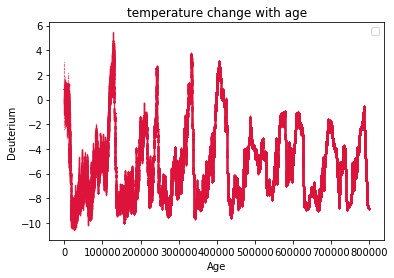

In [59]:
#colour = -np.arctan2(deu, temperature) # 生成每个点的颜色大小，每个数据点生成控制颜色的数组 colour
plt.scatter(time_08,temp_int,s=0.05,c='crimson' )
#plt.colorbar() 
plt.xlabel('Age')
plt.ylabel('Interpolated Temperature')
plt.title("temperature change with age")
plt.legend()

In [60]:
time = 1000*o18_data["Time"]
o18 = o18_data["d18O"]

No handles with labels found to put in legend.


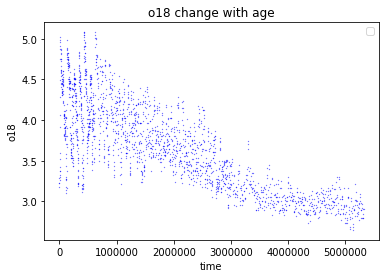

In [61]:
#colour = -np.arctan2(deu, temperature) # 生成每个点的颜色大小，每个数据点生成控制颜色的数组 colour
plt.scatter(time, o18,s=0.05,c='blue' )
#plt.colorbar() 
plt.xlabel('time')
plt.ylabel('o18')
plt.title("o18 change with age")
plt.legend()

In [78]:
deu_norm = (deu-deu.min())/(deu.max()-deu.min())
o18_norm = (o18-o18.min())/(o18.max()-o18.min())
temp_norm = (temp_int-temp_int.min())/(temp_int.max()-temp_int.min())

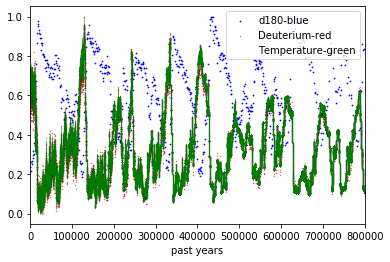

In [81]:
plt.xlim(0, 800000)
plt.scatter(time, o18_norm,s=0.5,c='blue' ,label ="d180-blue")
plt.scatter(age,deu_norm,s=0.1,c='crimson',label = "Deuterium-red" )
plt.scatter(time_08,temp_norm,s=0.001,c='green',label = "Temperature-green" )
plt.xlabel('past years')
plt.legend()

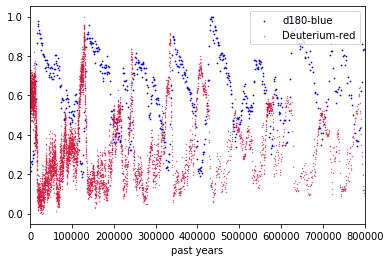

In [82]:
plt.xlim(0, 800000)
plt.scatter(time, o18_norm,s=0.5,c='blue' ,label ="d180-blue")
plt.scatter(age,deu_norm,s=0.1,c='crimson',label = "Deuterium-red" )
#plt.scatter(time_08,temp_norm,s=0.001,c='green',label = "Temperature-green" )
plt.xlabel('past years')
plt.legend()

In [83]:
###############################
# problem 2                   #
###############################
#先求出d18o有数值的时候对应的温度
temp_prob2 = []
d18o_prob2 = []
for i in range(len(time)) :
    if time[i]<=800000:
        temp_prob2.append(temp_int[int(time[i])])
        d18o_prob2.append(o18[i])


No handles with labels found to put in legend.


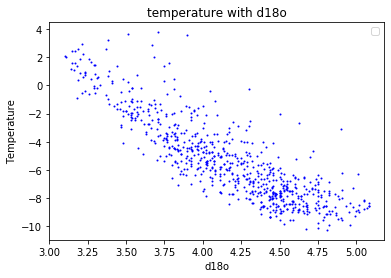

In [88]:
#colour = -np.arctan2(d18o_prob2, temp_prob2) # 生成每个点的颜色大小，每个数据点生成控制颜色的数组 colour
plt.scatter(d18o_prob2,temp_prob2,s=1,c='blue' )
#plt.colorbar() 
plt.ylabel('Temperature')
plt.xlabel('d18o')
plt.title("temperature with d18o")
plt.legend()

In [92]:
model = linear_model.LinearRegression()
d18o_prob2 = np.array(d18o_prob2).reshape(-1,1)
temp_prob2 = np.array(temp_prob2).reshape(-1,1)
model.fit(d18o_prob2, temp_prob2)     # model.fit(X, y)
pred = model.predict(d18o_prob2)

In [93]:
display(model.intercept_)  #截距
display(model.coef_)  #线性模型的系数

array([18.27703804])

array([[-5.66176575]])

No handles with labels found to put in legend.


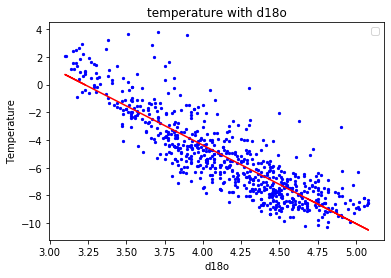

In [95]:
#colour = -np.arctan2(deu, temperature) # 生成每个点的颜色大小，每个数据点生成控制颜色的数组 colour
plt.scatter(d18o_prob2,temp_prob2,s=5,c='blue' )
plt.plot(d18o_prob2,pred,'r')
#plt.scatter(deu,pred,c='aqua',s=0.1,marker='x')
#plt.colorbar() 
plt.ylabel('Temperature')
plt.xlabel('d18o')
plt.title("temperature with d18o")
plt.legend()

In [96]:
loss = (pred-temp_prob2)*(pred-temp_prob2)
mse = loss.flatten().mean()
print("mean squared error is",mse)

mean squared error is 2.305565229883616


No handles with labels found to put in legend.


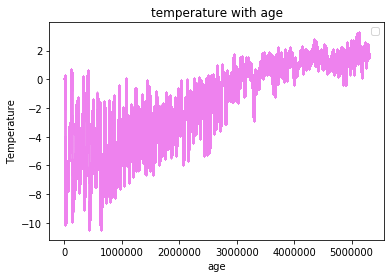

In [117]:
f=interpolate.interp1d(time,o18,kind='slinear')
o18_new = f(time_53)
temp_53 = model.predict(o18_new.reshape(-1,1))
temp_53 = temp_53.flatten()
plt.scatter(time_53,temp_53,s=0.05,c='violet' )
plt.ylabel('Temperature')
plt.xlabel('age')
plt.title("temperature with age")
plt.legend()

In [118]:
#################
# problem 3     #
#################
marine_data = pd.read_csv("./MarineIsotopeStages.csv")
marine_data

,MIS,StartAge,GlacialInterglacial
0,1,14000,0
1,4,71000,1
2,5,130000,0
3,6,191000,1
4,7,243000,0
5,8,300000,1
6,9,337000,0
7,10,374000,1
8,11,424000,0
9,12,478000,1


In [119]:
start_age = []
end_age = []
num=0
for i in range(len(marine_data["StartAge"])):
    if i%2 == 0:
        start_age.append(marine_data["StartAge"][i])
        end_age.append(marine_data["StartAge"][i+1])
colour = []
glacial =[]
for a in age:
    flag = False
    for k in range(len(start_age)):
        if a>=start_age[k] and a<= end_age[k]:
            colour.append('b')
            glacial.append(0)
            flag = True
            break
    if not flag:
        colour.append('r')
        glacial.append(1)

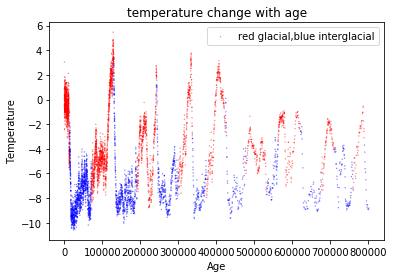

In [120]:
#colour = -np.arctan2(deu, temperature) # 生成每个点的颜色大小，每个数据点生成控制颜色的数组 colour
plt.scatter(age,temp,s=0.05,c=colour,label="red glacial,blue interglacial" )
#plt.colorbar() 
plt.xlabel('Age')
plt.ylabel('Temperature')
plt.title("temperature change with age")
plt.legend()

No handles with labels found to put in legend.


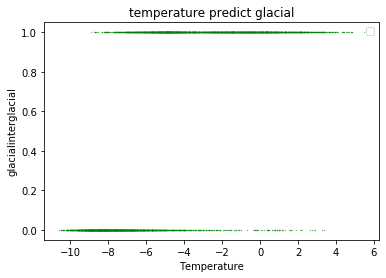

In [121]:
#colour = -np.arctan2(deu, temperature) # 生成每个点的颜色大小，每个数据点生成控制颜色的数组 colour
plt.scatter(temp,glacial,s=0.05,c='g' )
#plt.colorbar() 
plt.ylabel('glacialinterglacial')
plt.xlabel('Temperature')
plt.title("temperature predict glacial")
plt.legend()

In [127]:
log_model = linear_model.LogisticRegression()
log_model.fit(temp.values.reshape(-1,1), glacial)
test = np.linspace(-10, 6, 17).reshape(-1,1)
gla_pred = log_model.predict(test)
gla_prob = log_model.predict_proba(test)

/Users/machang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


No handles with labels found to put in legend.


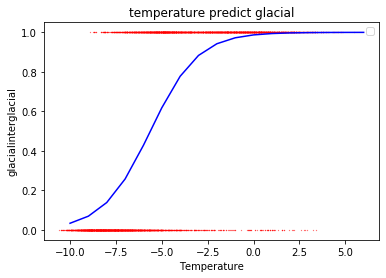

In [128]:
prob = gla_prob[:,1]
#colour = -np.arctan2(deu, temperature) # 生成每个点的颜色大小，每个数据点生成控制颜色的数组 colour
plt.plot(test,prob,'b-' )
plt.scatter(temp,glacial,s=0.05,c='r' )
plt.ylabel('glacialinterglacial')
plt.xlabel('Temperature')
plt.title("temperature predict glacial")
plt.legend()

In [131]:
pred_glacial_compare= log_model.predict(temp.values.reshape(-1,1))

In [132]:
cm = confusion_matrix(glacial, pred_glacial_compare)

In [133]:
print(cm)

[[2147  392]
 [ 481 2765]]


In [136]:
pred_glacial_53 = log_model.predict(temp_53.reshape(-1,1))

No handles with labels found to put in legend.


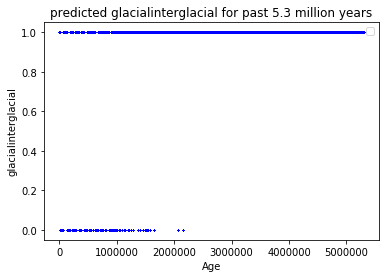

In [138]:
#colour = -np.arctan2(deu, temperature) # 生成每个点的颜色大小，每个数据点生成控制颜色的数组 colour
plt.scatter(time_53,pred_glacial_53,s=0.001,c='b' )
#plt.colorbar() 
plt.xlabel('Age')
plt.ylabel('glacialinterglacial')
plt.title("predicted glacialinterglacial for past 5.3 million years")
plt.legend()

In [140]:
colour_53 = []
for i in pred_glacial_53 :
    if i == 0:
        colour_53.append('blue')
    else:
        colour_53.append('orange')

In [ ]:
#colour = -np.arctan2(deu, temperature) # 生成每个点的颜色大小，每个数据点生成控制颜色的数组 colour
plt.scatter(time_53,temp_53,s=0.05,c=colour_53,label="red glacial,blue interglacial" )
#plt.colorbar() 
plt.xlabel('Age')
plt.ylabel('Temperature')
plt.title("temperature change with age")
plt.legend()